# Import libraries

In [41]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Partie 1: Dessinez une architecture type d'un CNN

In [2]:
model = Sequential()
model.add(Input(shape=(32,32,1)))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       163,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,170 (641.29 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 0 (0.00 B)

# Partie 2: Suivez le tutorial

## Import data

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


## Visualize some images

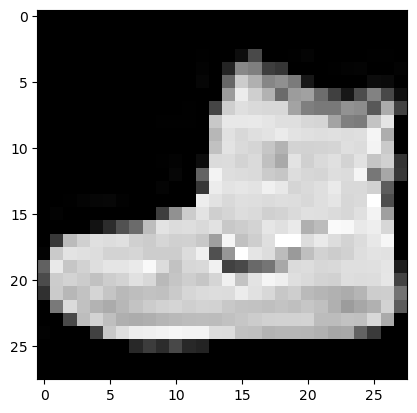

In [6]:
plt.imshow(x_train[0,:,:].reshape((28, 28)), cmap='gray')
plt.show()

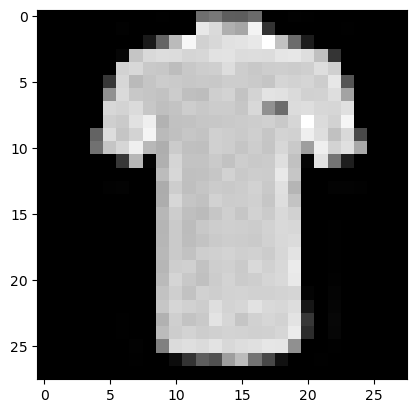

In [7]:
plt.imshow(x_train[1200,:,:].reshape((28, 28)), cmap='gray')
plt.show()

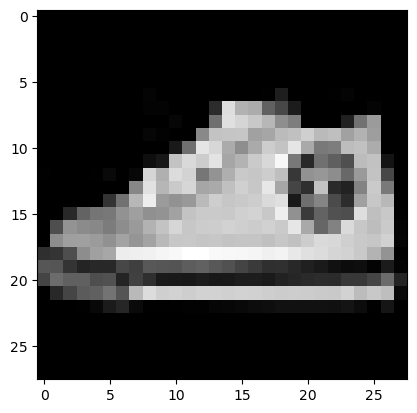

In [8]:
plt.imshow(x_train[40500,:,:].reshape((28, 28)), cmap='gray')
plt.show()

## Single-layer perceptron

### Binarize and flatten data

In [9]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 784)
x_test: (10000, 784)
y_train: (60000, 10)
y_test: (10000, 10)


### Create model

In [11]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

### Train model

In [13]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7580 - loss: 0.7028 - val_accuracy: 0.8168 - val_loss: 0.5088
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8321 - loss: 0.4816 - val_accuracy: 0.8373 - val_loss: 0.4608
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8428 - loss: 0.4495 - val_accuracy: 0.8472 - val_loss: 0.4365
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8482 - loss: 0.4327 - val_accuracy: 0.8445 - val_loss: 0.4351
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8528 - loss: 0.4225 - val_accuracy: 0.8538 - val_loss: 0.4209
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8541 - loss: 0.4155 - val_accuracy: 0.8535 - val_loss: 0.4173
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8555 - loss: 0.4083 - val_accuracy: 0.8562 - val_loss: 0.4176
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8572 - loss: 0.4029 - 

In [14]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8304 - loss: 0.4854
0.8303999900817871


## Increase the size of the hidden layer

In [15]:
model2 = Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8156 - loss: 0.5372 - val_accuracy: 0.8538 - val_loss: 0.4215
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.4045 - val_accuracy: 0.8575 - val_loss: 0.3974
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.3679 - val_accuracy: 0.8622 - val_loss: 0.3873
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8756 - loss: 0.3471 - val_accuracy: 0.8710 - val_loss: 0.3584
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8817 - loss: 0.3274 - val_accuracy: 0.8667 - val_loss: 0.3644
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3133 - val_accuracy: 0.8710 - val_loss: 0.3646
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3024 - val_accuracy: 0.8718 - val_loss: 0.3590
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8939 - loss: 0.2918 - 

In [16]:
_, test_acc = model2.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.3688
0.8704000115394592


## Add a hidden layer

In [17]:
model3 = Sequential()
model3.add(Input(shape=(784,)))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8152 - loss: 0.5254 - val_accuracy: 0.8563 - val_loss: 0.3963
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.3881 - val_accuracy: 0.8653 - val_loss: 0.3617
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8710 - loss: 0.3563 - val_accuracy: 0.8697 - val_loss: 0.3539
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8802 - loss: 0.3280 - val_accuracy: 0.8723 - val_loss: 0.3577
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8865 - loss: 0.3122 - val_accuracy: 0.8740 - val_loss: 0.3573
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.2973 - val_accuracy: 0.8780 - val_loss: 0.3520
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8951 - loss: 0.2863 - val_accuracy: 0.8788 - val_loss: 0.3410
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8975 - loss: 0.2775 - 

In [18]:
_, test_acc = model3.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8786 - loss: 0.3577
0.878600001335144


## Convolutional neural network (CNN)

### Reload data and preprocess

In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
y_train: (60000, 10)
y_test: (10000, 10)


In [21]:
model4 = Sequential()
model4.add(Input(shape=(28,28,1)))
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8461 - loss: 0.4400 - val_accuracy: 0.8822 - val_loss: 0.3333
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8899 - loss: 0.3122 - val_accuracy: 0.8915 - val_loss: 0.3076
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9001 - loss: 0.2819 - val_accuracy: 0.8990 - val_loss: 0.2858
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9083 - loss: 0.2604 - val_accuracy: 0.8913 - val_loss: 0.2984
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9140 - loss: 0.2436 - val_accuracy: 0.9018 - val_loss: 0.2736
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9185 - loss: 0.2298 - val_accuracy: 0.8975 - val_loss: 0.2879
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9214 - loss: 0.2185 - val_accuracy: 0.9033 - val_loss: 0.2765
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9245 -

In [24]:
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8943 - loss: 0.3007
0.8942999839782715


### Create a more 'deep' model 

In [25]:
model5 = Sequential()
model5.add(Input(shape=(28,28,1)))
model5.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,842 (253.29 KB)

 Trainable params: 64,842 (253.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history5 = model5.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9478 - loss: 0.1479 - val_accuracy: 0.9088 - val_loss: 0.2602
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9486 - loss: 0.1394 - val_accuracy: 0.9088 - val_loss: 0.2741
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9525 - loss: 0.1319 - val_accuracy: 0.9080 - val_loss: 0.2734
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9544 - loss: 0.1264 - val_accuracy: 0.9095 - val_loss: 0.2689
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9563 - loss: 0.1184 - val_accuracy: 0.9077 - val_loss: 0.2909
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9590 - loss: 0.1136 - val_accuracy: 0.9070 - val_loss: 0.3031
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9601 - loss: 0.1093 - val_accuracy: 0.9113 - val_loss: 0.2872
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9626 -

In [28]:
_, test_acc = model5.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9089 - loss: 0.2751
0.9089000225067139


In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Add dropout layer(s)

In [29]:
model6 = Sequential()
model6.add(Input(shape=(28,28,1)))
model6.add(Dropout(0.2))
model6.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(10, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# model6.fit(x_train, y_train, epochs=10, validation_split=0.1)

In [31]:
_, test_acc = model6.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0660 - loss: 2.2918
0.06599999964237213


In [48]:
model7 = Sequential()
model7.add(Input(shape=(28,28,1)))
model7.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Dropout(0.25))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(10, activation='softmax'))
model7.add(Dropout(0.25))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history7 = model7.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.6416 - loss: 4.3260 - val_accuracy: 0.8642 - val_loss: 0.3730
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.6755 - loss: 4.2266 - val_accuracy: 0.8682 - val_loss: 0.3570
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.6845 - loss: 4.1982 - val_accuracy: 0.8983 - val_loss: 0.2853
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.6885 - loss: 4.1872 - val_accuracy: 0.8985 - val_loss: 0.2787
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.6932 - loss: 4.1880 - val_accuracy: 0.9065 - val_loss: 0.2633
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.6951 - loss: 4.1886 - val_accuracy: 0.9032 - val_loss: 0.2750
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.6998 - loss: 4.1626 - val_accuracy: 0.9075 - val_loss: 0.2532
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.6996 -

In [34]:
_, test_acc = model7.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9073 - loss: 0.2622
0.9072999954223633


In [ ]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Augment the data

In [61]:
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

model8 = Sequential()
model8.add(Input(shape=(28,28,1)))
model8.add(Rescaling(1./255))
model8.add(RandomFlip("horizontal_and_vertical"))
model8.add(RandomRotation(0.2))
model8.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')) 
model8.add(MaxPooling2D(pool_size=2))
model8.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model8.add(MaxPooling2D(pool_size=2))
model8.add(Flatten())
model8.add(Dense(10, activation='softmax'))
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model8.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_7 (RandomFlip)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,842 (253.29 KB)

 Trainable params: 64,842 (253.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history8 = model8.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.1006 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3032
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3032
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.0925 - val_loss: 2.3028
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1055 - val_loss: 2.3027
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.0990 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0982 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3027
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.0976 -

In [64]:
_, test_acc = model8.evaluate(x_test, y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1000 - loss: 2.3026
0.10000000149011612


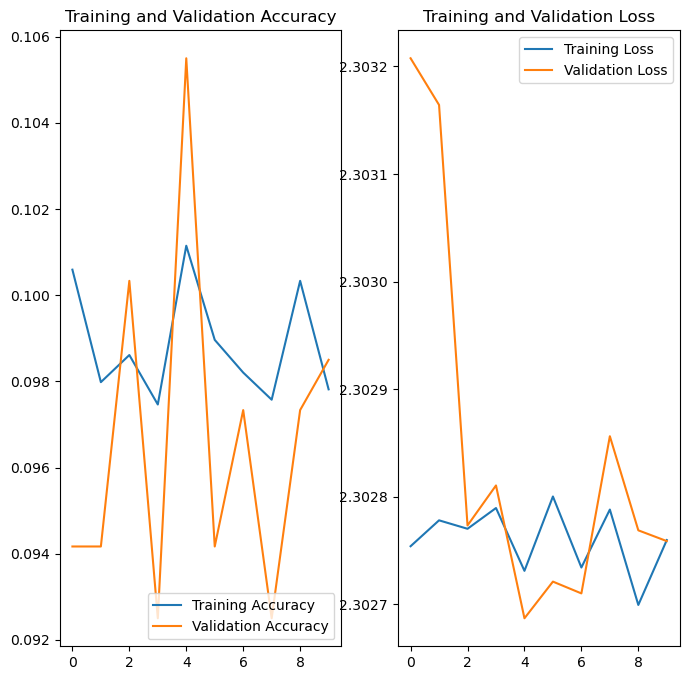

In [65]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [66]:
model9 = Sequential()
model9.add(Input(shape=(28,28,1)))
model9.add(Rescaling(1./255))
# model9.add(RandomFlip("horizontal_and_vertical"))
# model9.add(RandomRotation(0.2))
model9.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model9.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')) 
model9.add(MaxPooling2D(pool_size=2))
model9.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model9.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model9.add(MaxPooling2D(pool_size=2))
model9.add(Flatten())
model9.add(Dense(10, activation='softmax'))
model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model9.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,362 (235.79 KB)

 Trainable params: 60,362 (235.79 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history9 = model9.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.0976 - loss: 2.3028 - val_accuracy: 0.0985 - val_loss: 2.3027
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.1003 - val_loss: 2.3027
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1050 - val_loss: 2.3027
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0999 - loss: 2.3028 - val_accuracy: 0.1008 - val_loss: 2.3027
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0995 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3029
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1008 - val_loss: 2.3026
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.0925 - val_loss: 2.3030
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.1000 -

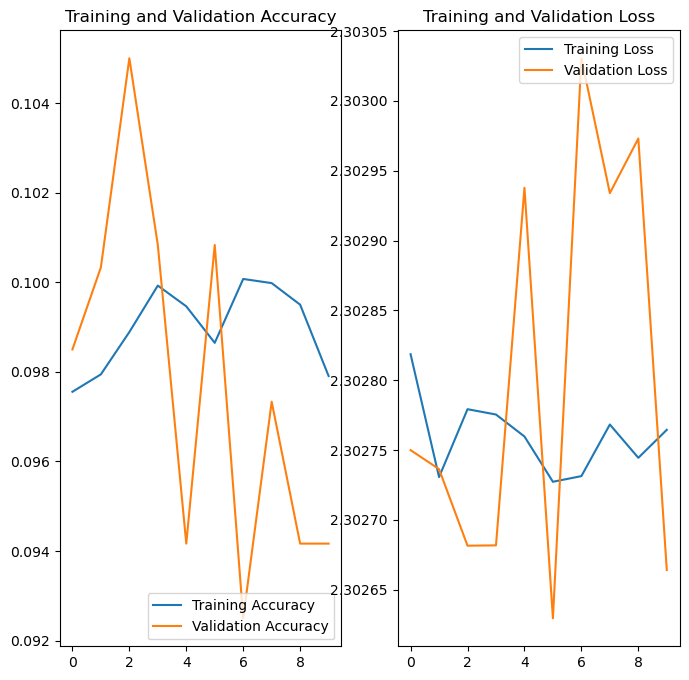

In [69]:
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']

loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
